# Data Visualization of Spotify's Hip Hop Data



## Importing libraries



In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import random

warnings.filterwarnings('ignore')

## Loading Data

In [54]:
df1 = pd.read_csv("/content/hip_hop_data.csv")

In [56]:
# Sort the DataFrame by the "release date" column
df1 = df1.sort_values(by='release_date')


In [57]:
df1.head()

,artist_name,track_name,genres,followers,popularity,duration,release_date,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
467,The Notorious B.I.G.,Suicidal Thoughts - 2005 Remaster,"['east coast hip hop', 'gangster rap', 'hardco...",8718394,68,170.213,1994-09-13,0.604,0.501,0.4250,0.4660,0.000009,0.091,0.0956,78.610,hip hop
469,The Notorious B.I.G.,Who Shot Ya? - 2005 Remaster,"['east coast hip hop', 'gangster rap', 'hardco...",8718394,67,319.360,1994-09-13,0.831,0.682,0.2380,0.2560,0.000000,0.494,0.6000,91.771,hip hop
460,The Notorious B.I.G.,Big Poppa - 2005 Remaster,"['east coast hip hop', 'gangster rap', 'hardco...",8718394,81,252.746,1994-09-13,0.780,0.575,0.2730,0.4300,0.000000,0.143,0.7730,84.492,hip hop
462,The Notorious B.I.G.,Juicy - 2005 Remaster,"['east coast hip hop', 'gangster rap', 'hardco...",8718394,76,302.760,1994-09-13,0.889,0.818,0.2530,0.4700,0.000000,0.179,0.7820,96.063,hip hop
463,The Notorious B.I.G.,Mo Money Mo Problems (feat. Puff Daddy & Mase)...,"['east coast hip hop', 'gangster rap', 'hardco...",8718394,74,257.399,1997-03-04,0.845,0.884,0.0759,0.0128,0.000002,0.203,0.9040,104.536,hip hop


In [58]:
df1.describe()

,followers,popularity,duration,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.234552e+07,74.438000,206.884796,0.723476,0.634764,0.174774,0.184937,0.015540,0.205668,0.464908,122.274612
std,1.414084e+07,7.016311,60.363625,0.139976,0.151252,0.122453,0.203310,0.090070,0.152277,0.223645,28.093029
min,1.402518e+06,37.000000,73.386000,0.216000,0.095800,0.025100,0.000015,0.000000,0.023500,0.035200,57.750000
25%,5.112480e+06,70.000000,166.539500,0.650500,0.537000,0.064900,0.033500,0.000000,0.105000,0.285500,97.099750
50%,8.747962e+06,75.000000,200.179500,0.741500,0.640500,0.144500,0.097850,0.000000,0.143000,0.459500,124.998500
75%,1.204705e+07,79.000000,237.759000,0.831000,0.741000,0.263250,0.269000,0.000027,0.274250,0.637500,141.988500
max,7.363790e+07,96.000000,588.139000,0.970000,0.956000,0.619000,0.948000,0.895000,0.873000,0.966000,207.982000


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 467 to 366
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       500 non-null    object 
 1   track_name        500 non-null    object 
 2   genres            500 non-null    object 
 3   followers         500 non-null    int64  
 4   popularity        500 non-null    int64  
 5   duration          500 non-null    float64
 6   release_date      500 non-null    object 
 7   danceability      500 non-null    float64
 8   energy            500 non-null    float64
 9   speechiness       500 non-null    float64
 10  acousticness      500 non-null    float64
 11  instrumentalness  500 non-null    float64
 12  liveness          500 non-null    float64
 13  valence           500 non-null    float64
 14  tempo             500 non-null    float64
 15  track_genre       500 non-null    object 
dtypes: float64(9), int64(2), object(5)
memory 

In [60]:
df_new = df1[["followers", "popularity", "duration", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]

## Normalizing Data

In [61]:
target = df_new.pop('popularity')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
columns = ["followers", "duration", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
# Convert the normalized data back to a Pandas DataFrame
df_normalized = pd.DataFrame(df_scaled, columns=columns)

# Add the target column back to the normalized DataFrame
df_normalized['popularity'] = target

df_normalized.head()

,followers,duration,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,-0.256757,-0.608123,-0.854403,-0.885263,2.045490,1.383823,-0.172607,-0.753777,-1.652966,-1.555843,91
1,-0.256757,1.865160,0.768931,0.312616,0.516843,0.349882,-0.172708,1.895364,0.604649,-1.086895,88
2,-0.256757,0.760510,0.404217,-0.395522,0.802953,1.206576,-0.172708,-0.411953,1.378970,-1.346258,86
3,-0.256757,1.589885,1.183704,1.212680,0.639462,1.403517,-0.172708,-0.175305,1.419252,-0.933963,86
4,-0.256757,0.837670,0.869049,1.649475,-0.808257,-0.847521,-0.172685,-0.017540,1.965305,-0.632056,85


In [62]:
df2 = df_normalized.copy()

## Displaying columns with respect to time:

The graphs show trends of various factors with respect to time. This shows people's interests and changes in taste of type of music since 1995 to 2005.

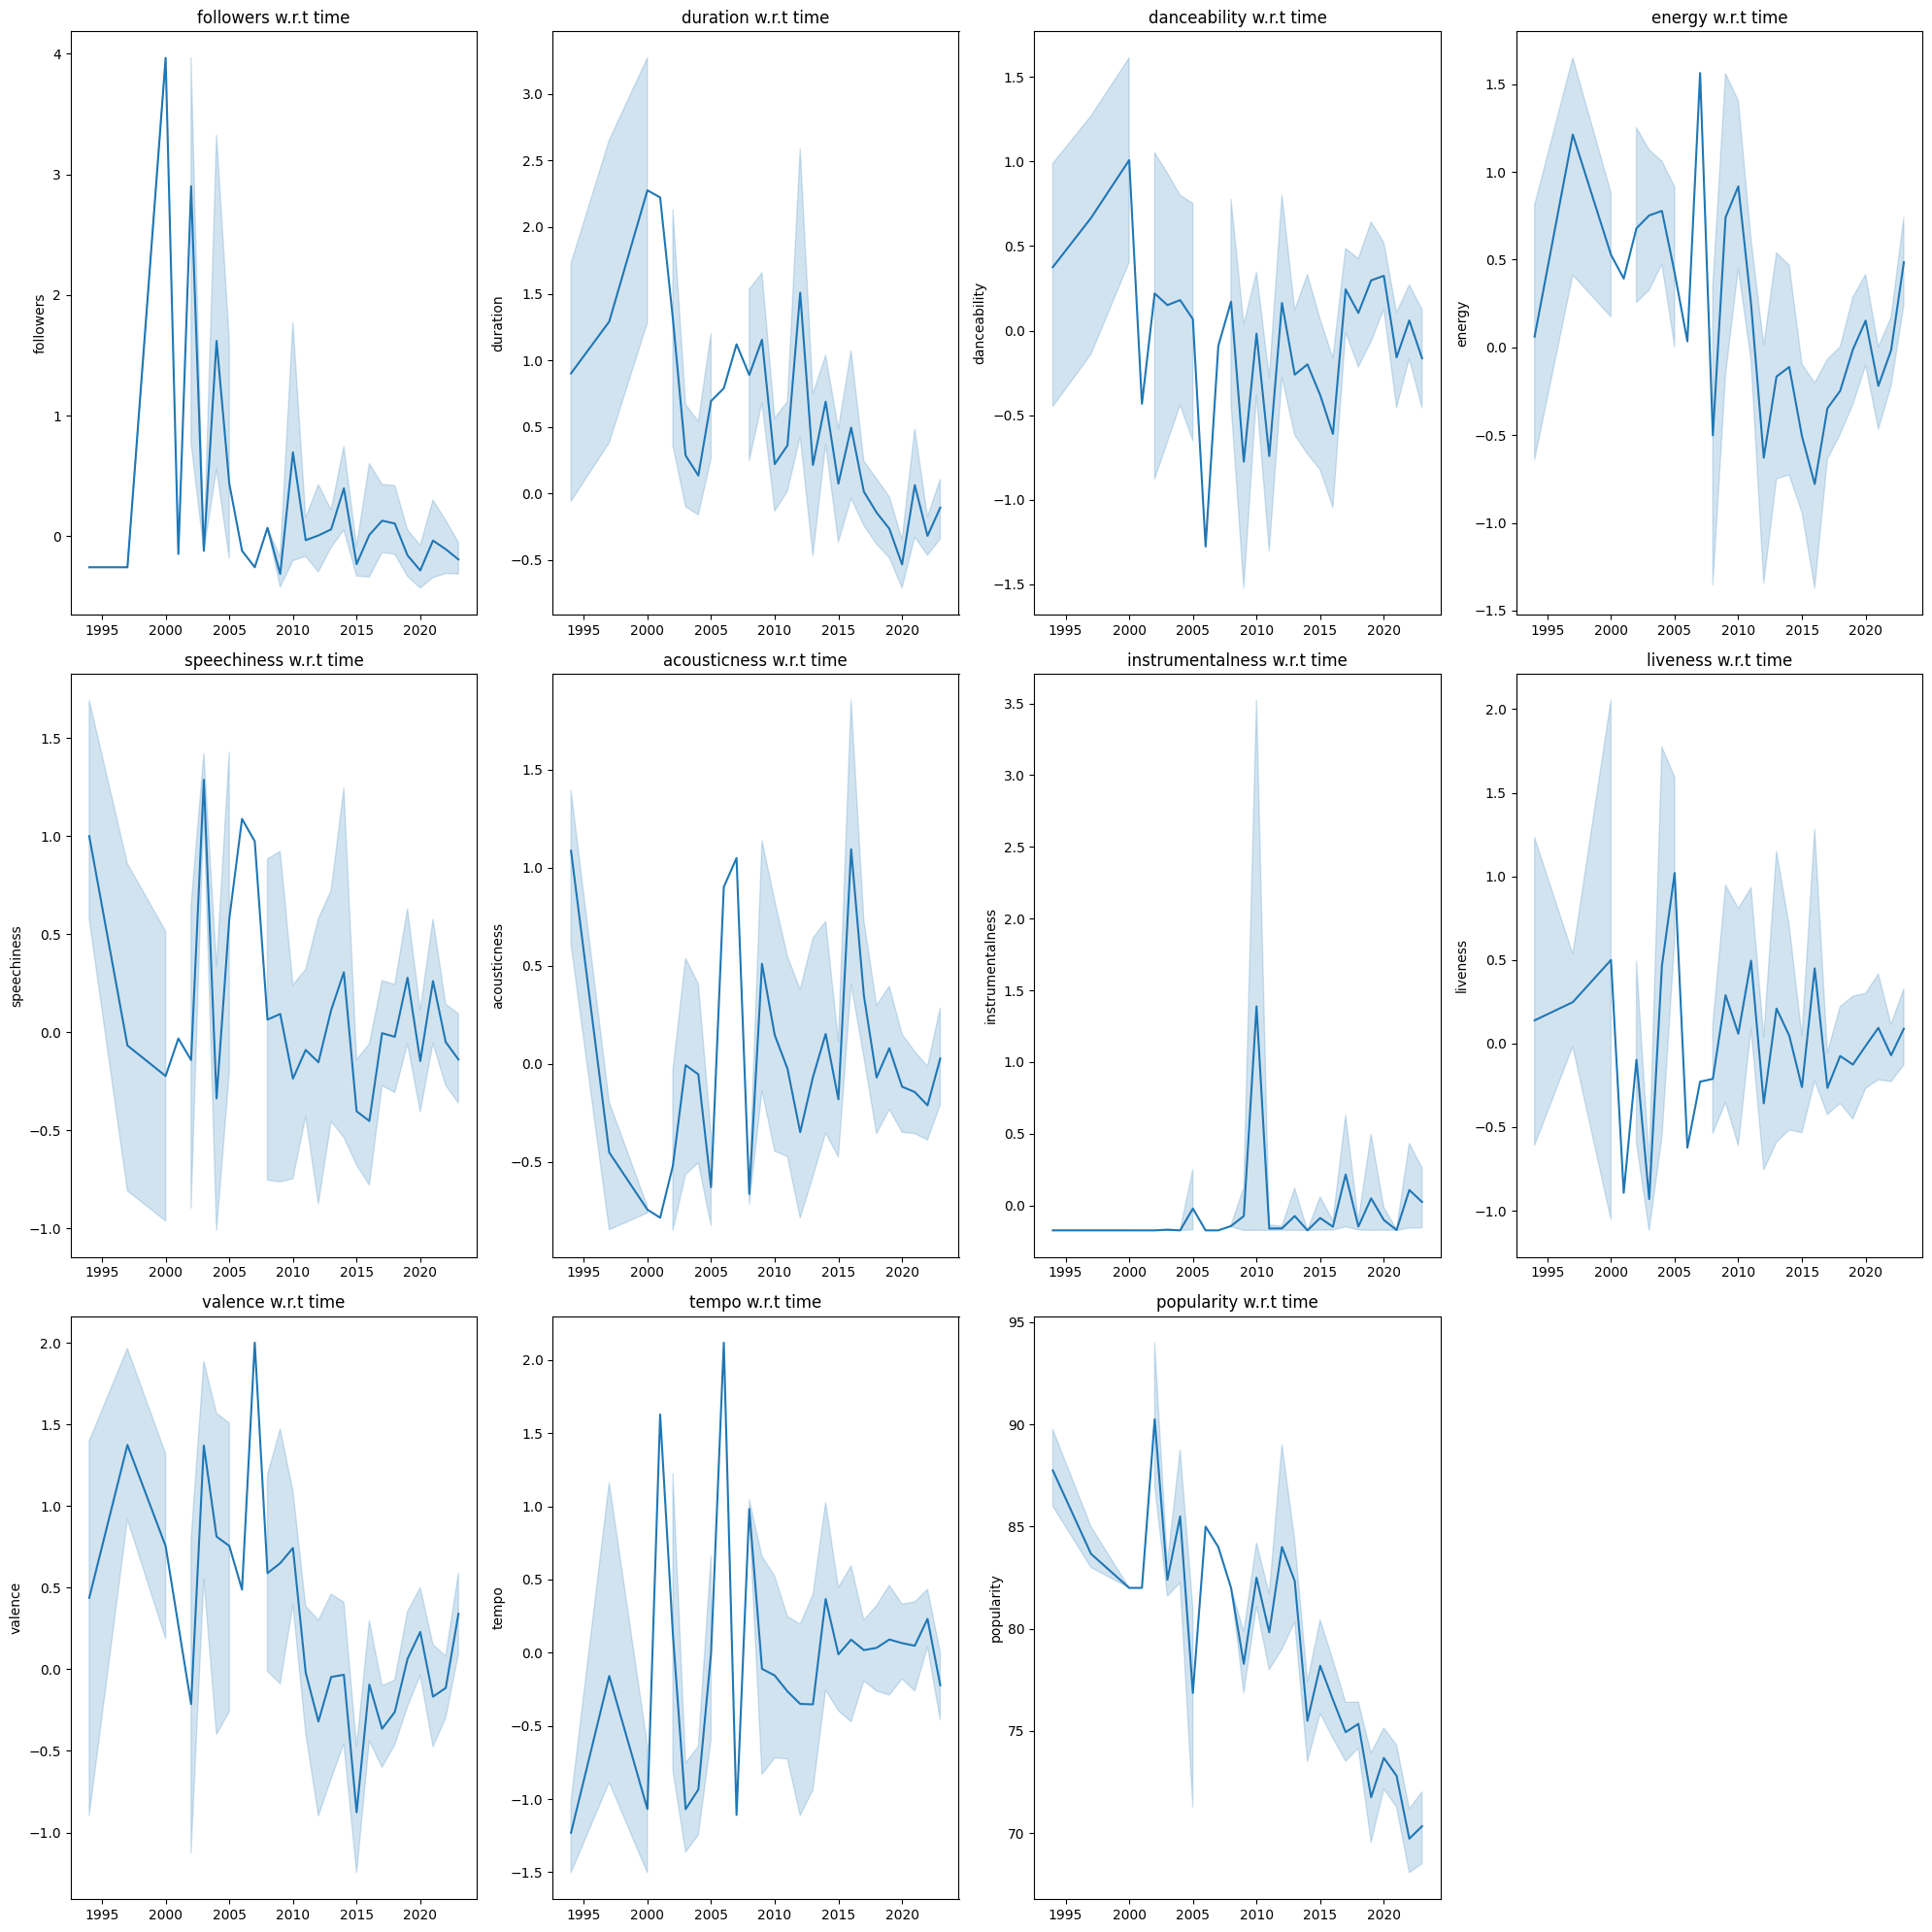

In [65]:
fig1, axs1 = plt.subplots(nrows=3, ncols=4, figsize=(20,20))
release_year1 = [int(i.split("-")[0]) for i in df1["release_date"]]
release_year1.sort()
for i, ax in enumerate(axs1.flat):
    if i >= len(df2.columns):
        fig1.delaxes(ax)
        break
    
    # Plot the data on the current axis
    sns.lineplot(x=release_year1, y=df2[df2.columns[i]], ax=ax)
    ax.set_title(f"{df2.columns[i]} w.r.t time")

# Adjust the spacing between subplots
fig1.tight_layout()

# Display the plot
plt.show()


# Important charts


1.   The first chart shows the popularity distribution of songs.
2.   Second chart shows the relation of Popularity of a song with respect to the followers of the artist.
3.   The overall trend of hip hop music since 1995.



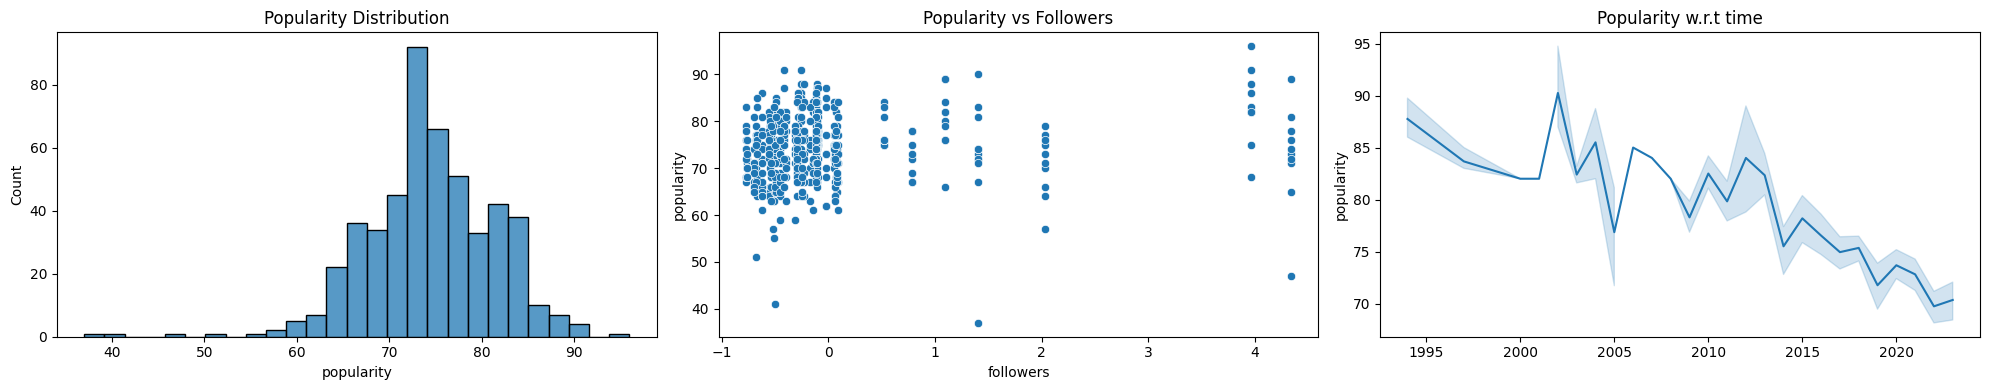

In [67]:
# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

# Distribution of popularity
sns.histplot(df2['popularity'], kde=False, ax=axs[0])
axs[0].set_title('Popularity Distribution')

# Scatter plot of popularity vs followers
sns.scatterplot(data=df2, x='followers', y='popularity', ax=axs[1])
axs[1].set_title('Popularity vs Followers')

# draw lineplot
sns.lineplot(x=release_year1, y=df2["popularity"], ax=axs[2])
axs[2].set_title("Popularity w.r.t time")

# Adjust the layout and save the figure
fig.tight_layout()
plt.show()

## Correlation matrix
The matrix shows that the number of followers of an artist is the key factor in the popularity of a song.

Text(0.5, 1.0, 'Correlation Heatmap')

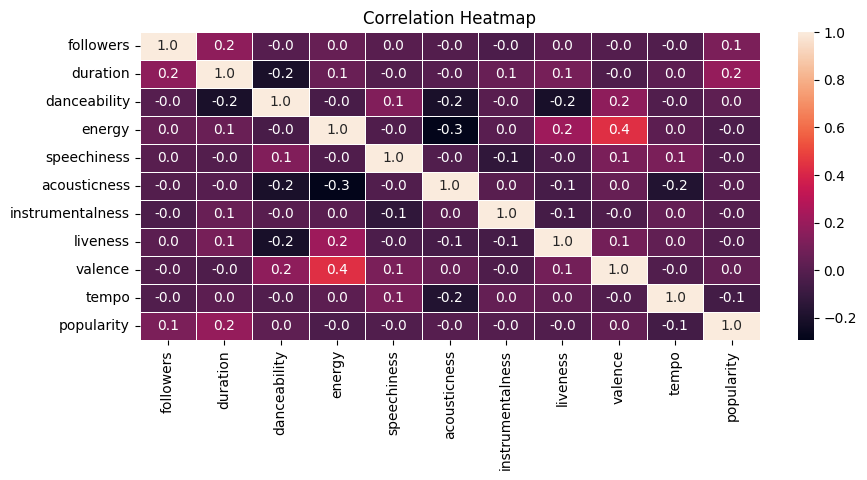

In [68]:
#correlation map
f,ax = plt.subplots(figsize=(10,4))
corr = df2.corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
# Correlation heatmap
plt.title('Correlation Heatmap')

## Feature charts
The charts show trends of all features with each other.

<Figure size 1600x800 with 0 Axes>

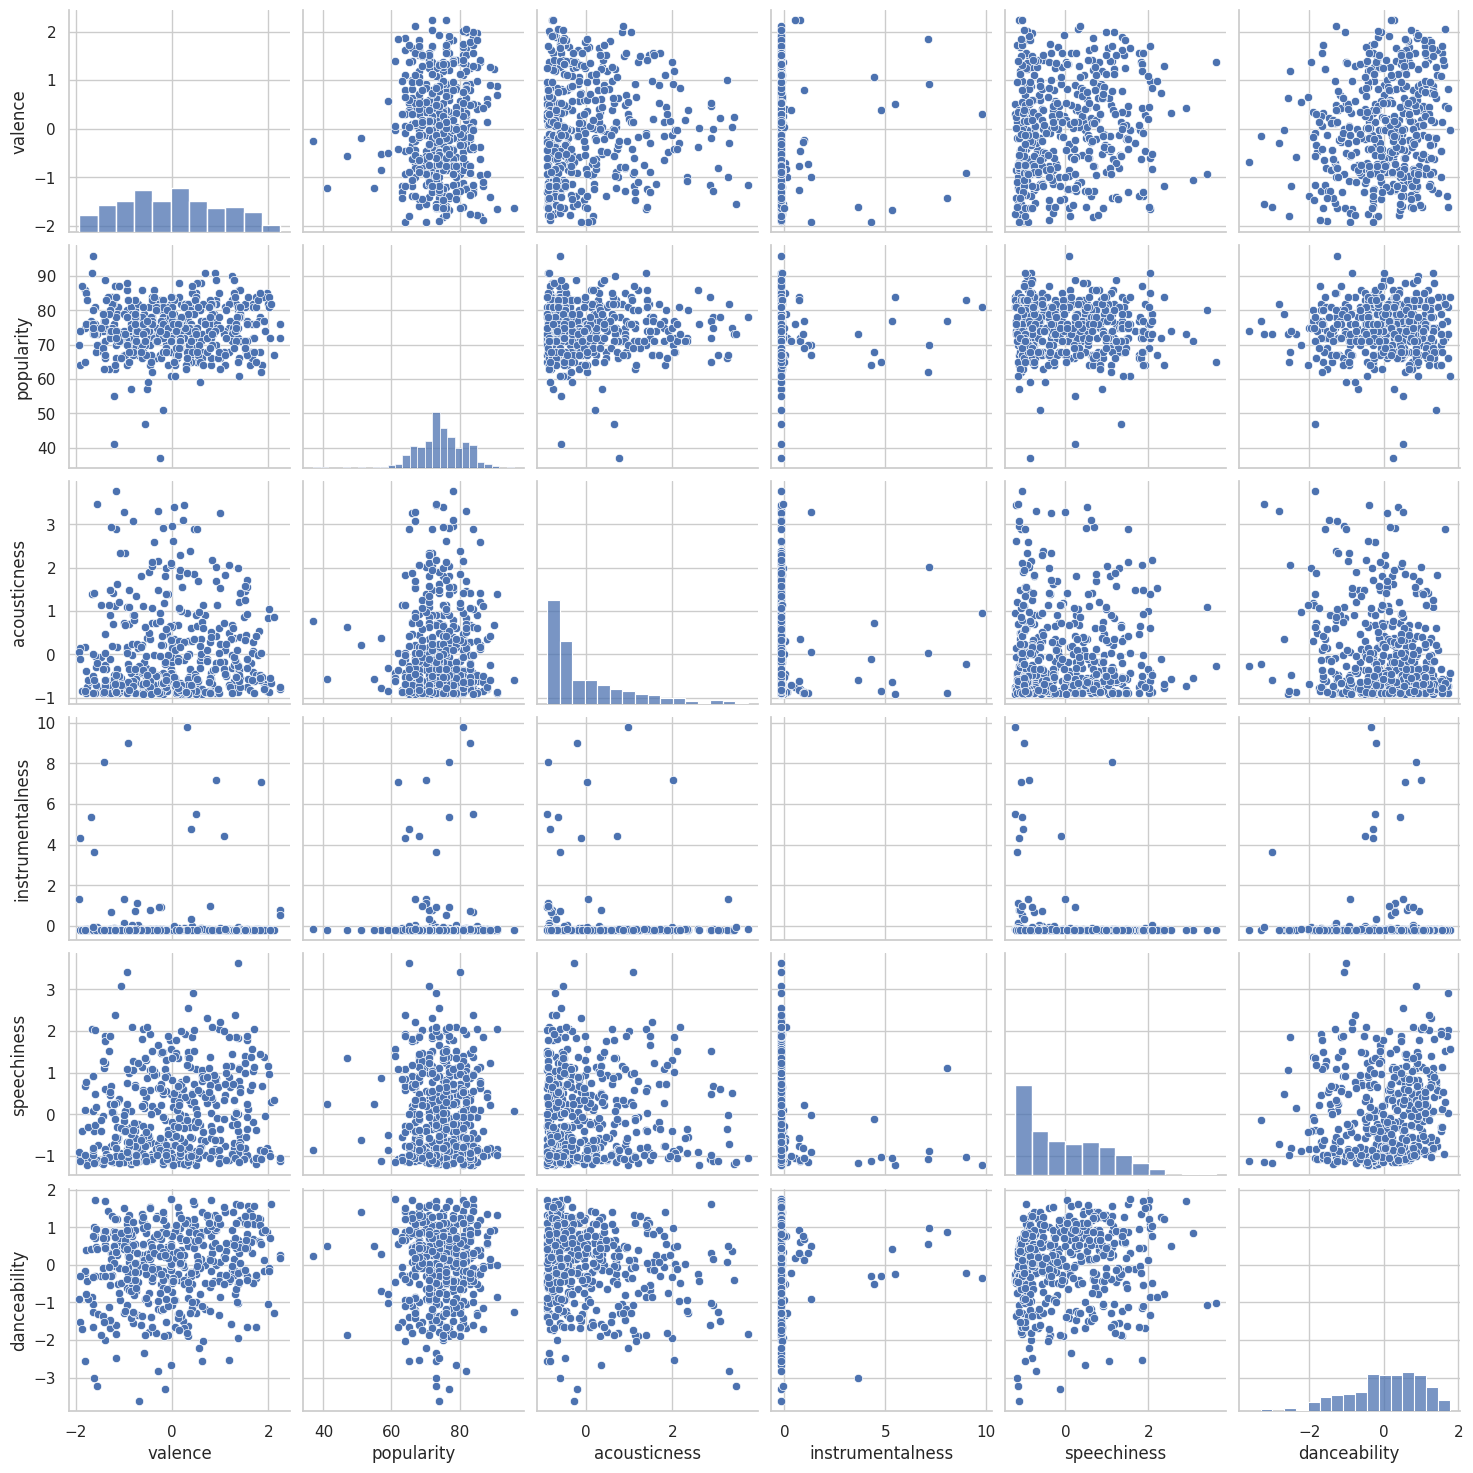

In [69]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df2[cols], height = 2.5 )
plt.show()

## Extra trees regressor
The extra trees regressor model is used to visualize the impact of various features on the popularity of a song.

In [70]:
def extra_trees_regressor(df, X, y):
      model = ExtraTreesRegressor()
      model.fit(X, y)
      # plot graph of feature importances for better visualization
      return model

In [71]:
X = df2[['followers', 'duration', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df2['popularity']

In [72]:
model = extra_trees_regressor(df2, X, y)

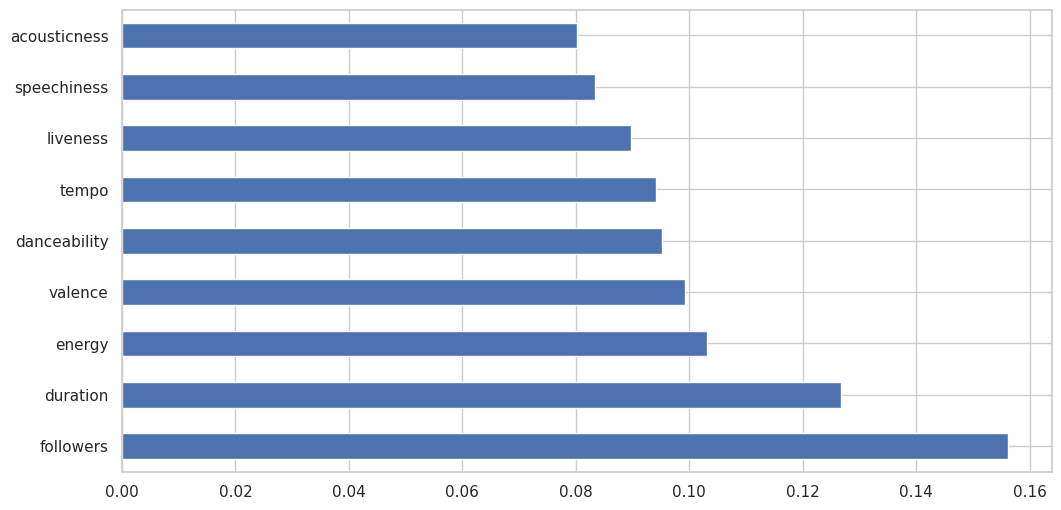

In [73]:
plt.figure(figsize=[12, 6])
feat_importances = pd.Series(model.feature_importances_, index=df2[
    ['followers', 'duration', 'danceability', 'energy', 'speechiness',
  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# Regression Model
Model to predict popularity of a song based on features.

In [74]:
shuffled_df = df2.sample(frac=1, random_state=42)

X = shuffled_df.drop("popularity", axis=1)
y = shuffled_df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Training

In [76]:
# Train the model
history = model.fit(X_train, y_train, epochs=75, validation_split=0.2)

Epoch 1/75
8/8 [==============================] - 0s 28ms/step - loss: 93.7985 - mae: 7.6460 - val_loss: 125.7533 - val_mae: 8.4197
Epoch 2/75
8/8 [==============================] - 0s 10ms/step - loss: 93.1046 - mae: 7.6128 - val_loss: 125.4092 - val_mae: 8.3901
Epoch 3/75
8/8 [==============================] - 0s 12ms/step - loss: 92.3935 - mae: 7.5826 - val_loss: 124.4938 - val_mae: 8.3454
Epoch 4/75
8/8 [==============================] - 0s 16ms/step - loss: 91.7837 - mae: 7.5547 - val_loss: 123.8426 - val_mae: 8.3092
Epoch 5/75
8/8 [==============================] - 0s 10ms/step - loss: 91.1223 - mae: 7.5274 - val_loss: 123.4780 - val_mae: 8.2823
Epoch 6/75
8/8 [==============================] - 0s 10ms/step - loss: 90.4889 - mae: 7.4996 - val_loss: 122.5351 - val_mae: 8.2374
Epoch 7/75
8/8 [==============================] - 0s 12ms/step - loss: 89.6098 - mae: 7.4627 - val_loss: 122.6946 - val_mae: 8.2657
Epoch 8/75
8/8 [==============================] - 0s 18ms/step - loss: 88.95

# Model Evaluation

In [25]:
# Evaluate the model
model_result = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 132.8020 - mae: 9.2420


In [27]:
# Make predictions on the test data
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [28]:
y_pred = [int(i) for i in y_pred]

# Results visualization
The graph below shows a scatterplot of predicted and actual test values.

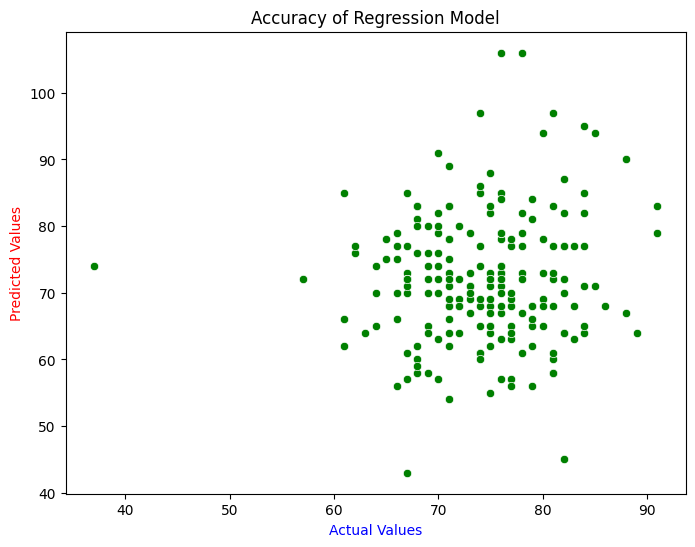

In [45]:
# Visualize the accuracy of the model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='g')
plt.xlabel("Actual Values", color='b')
plt.ylabel("Predicted Values", color='r')
plt.title("Accuracy of Regression Model")
plt.show()

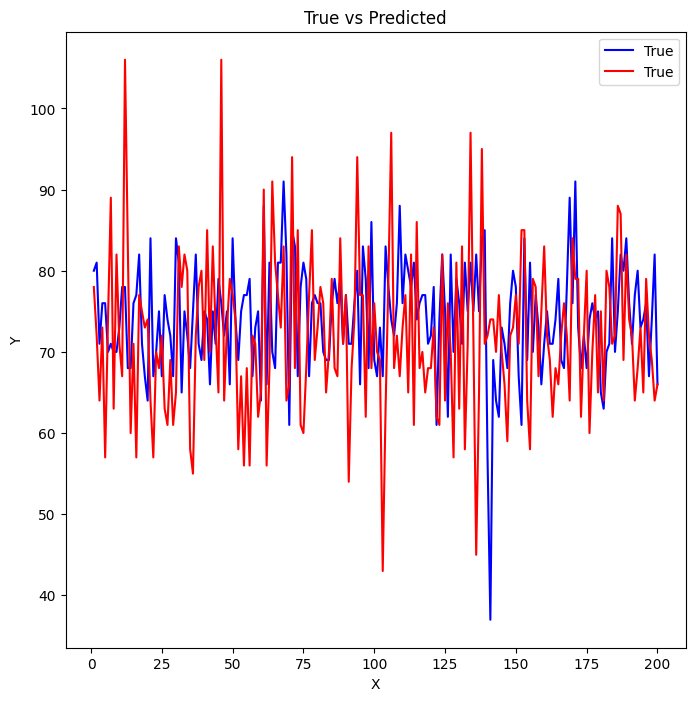

In [44]:
# Generate some sample data
x = np.linspace(1, len(y_pred), len(y_pred))

# Create a figure with two subplots
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# Plot y_true on the first subplot
ax1.plot(x, y_test, label='True', color = 'b')
ax1.plot(x, y_pred, label='True', color = 'r')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('True vs Predicted')
ax1.legend()

# Show the plot
plt.show()

# Make Predictions

Replace the values in the ```prediction_input``` dictionary as required.

**Note:** For now, the predictions are made on random values.

In [53]:
prediction_input = {
    'followers':random.randint(1402518,73637900), 'duration':random.uniform(73,588), 'danceability':random.uniform(0.2,0.97),
    'energy':random.uniform(0.09,0.95), 'speechiness':random.uniform(0.02,0.6), 'acousticness':random.uniform(0.000015, 0.94), 
    'instrumentalness':random.uniform(0,0.89), 'liveness':random.uniform(0.023,0.87), 'valence':random.uniform(0.03,0.966), 'tempo':random.uniform(57,207)
}
print(prediction_input)
input_array = [[prediction_input[i] for i in prediction_input.keys()]]
transformed_input = scaler.transform(input_array)
prediction_output = model.predict(transformed_input)[0][0]

if prediction_output > 75:
  print(f"Congrats, Your song has the potential to be popular with a probability of: {prediction_output}%")
else:
  print(f"Unfortunately, Your song does not have the potential to be popular with a probability of: {prediction_output}%")

{'followers': 23222051, 'duration': 351.0482209872009, 'danceability': 0.8777438108124835, 'energy': 0.5444966166829803, 'speechiness': 0.2597343257726734, 'acousticness': 0.8457171149122815, 'instrumentalness': 0.5816031411623858, 'liveness': 0.6177739161818336, 'valence': 0.7094813659799382, 'tempo': 129.76563215221017}
1/1 [==============================] - 0s 22ms/step
Unfortunately, Your song does not have the potential to be popular with a probability of: 53.10204315185547%
